# Using ete-build to run multiple workflows at once

This recipe shows how to exploit the potential of executing several phylogenetic workflows at the same dataset. It can be used for checking results from different aligners or inference programs. 

The following commands illustrate this feature by testing many aligners, with and without trimming. 

## Requirements
- ete3
- ete3_external_apps
- [basic concepts about ete-build](ete_build_basics.ipynb) 
- [composing workflows](ete_build_composing_workflows.ipynb)


## Recipe

### 1.Get your sequences ready as a FASTA file 

We will use a toy example with 25 sequences. Clean FASTA headers are recommended.

In [5]:
%%bash
wget http://etetoolkit.org/static/data/NUP62.aa.fa 2>/dev/null
head NUP62.aa.fa -n14

>Phy003I7ZJ_CHICK
TMSQFNFSSAPAGGGFSFSTPKTAASTTAATGFSFTPAPSSGFTFGGAAPTPASSQPVTP
FSFSTPASSALPTAFSFGTPATATTAAPAASVFPLGGNAPKLNFGGTSTTQATGITGGFG
FGTSAPTSVPSSQAAAPSGFMFGTAATTTTTTTAAQPGTTGGFTFSSGTTTQAGTTGFNI
GATSTAAPQAVPTGLTFGAAPAAAATTTASLGSTTQPAATPFSLGGQSSATLTASTSQGP
TLSFGSKLGVTTTASTTTAASTAPLLGSTGPVLFASIASSSAPASSTSTGLSLGAPSTGT
TGLGTSGFGLKPPGTTAAATSTATSTSASSFALNLKPLTTTGTIGAVTSTAAITTTTPSA
PPVMTYAQLESLINKWSLELEDQEKHFLHQATQVNAWDRTLIENGEKITSLHREVEKVKL
DQKRLDQELDFILSQQKELEDLLTPLEESVKEQSGTIYLQHADEERERTYKLAENIDAQL
KRMAQDLKDIIEHLNTSGRPADTSDPLQQICKILNAHMDSLQWIDQNSALLQRKVEEVTK
VCESRRKEQERSFRITFD
>Phy0054BO3_MELGA
GNAPKLNFGGTSTTQATGITGGFGFGTSAPTSVPSSQAAAPSGFMFGSATATTTTTTAAQ
PGTTGGFTFSSGTTTQAGTTGFNIGTTSTAAPQAAPTGLTFGAAPAAAAATTTASLGSTA


## 2. Check available aligners in ete3

In [3]:
%%bash 
ete3 build apps aligners

--------------------------------------------------------------------------------------------------------------------
                                                      aligners                                                      
--------------------------------------------------------------------------------------------------------------------
name                 | app type   | desc.                                                                           
==================== | ========== | ================================================================================
metaligner_phylomedb | metaligner | Meta-aligning based on head/tail alignments produced by muscle, mafft and dialig
                     |            | n-tx, scanned with M-Coffee. Unconsistent columns are removed and final alignmen
                     |            | t is cleaned with trimAl                                                        
metaligner_trimmed   | metaligner | Meta-aligning based on head/

### 3. Compose the names of the target workflows

You can do this by hand, or with some bash scripting.

In [8]:
%%bash
for aligner in mafft_einsi mafft_linsi mafft_ginsi clustalo_default;
    do echo $aligner-none-none-fasttree_default; 
done;

mafft_einsi-none-none-fasttree_default
mafft_linsi-none-none-fasttree_default
mafft_ginsi-none-none-fasttree_default
clustalo_default-none-none-fasttree_default


### 4. Run all workflows at once

In [10]:
%%bash 
ete3 build -a NUP62.aa.fa -o test_aligners --clearall -w mafft_einsi-none-none-fasttree_default \
    mafft_linsi-none-none-fasttree_default \
    mafft_ginsi-none-none-fasttree_default \
    clustalo_default-none-none-fasttree_default;
    

Toolchain path: /Users/jhc/anaconda/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build - reproducible phylogenetic workflows 
                                    unknown, unknown.

      If you use ETE in a published work, please cite:

        Jaime Huerta-Cepas, Joaquín Dopazo and Toni Gabaldón. ETE: a python
        Environment for Tree Exploration. BMC Bioinformatics 2010,
        11:24. doi:10.1186/1471-2105-11-24

      (Note that a list of the external programs used to complete all necessary
      computations will be also shown after execution. Those programs should
      also be cited.)
      --------------------------------------------------------------------------------

    
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - FastTree Version 2.1.8 Double precision (No SSE3), OpenMP (1 threa

After a few seconds, you should get 4 trees under the `test_aligners/` directory

In [11]:
%%bash
find test_aligners/ -name '*.final_tree.nw'

test_aligners/clustalo_default-none-none-fasttree_default/NUP62.aa.fa.final_tree.nw
test_aligners/mafft_einsi-none-none-fasttree_default/NUP62.aa.fa.final_tree.nw
test_aligners/mafft_ginsi-none-none-fasttree_default/NUP62.aa.fa.final_tree.nw
test_aligners/mafft_linsi-none-none-fasttree_default/NUP62.aa.fa.final_tree.nw


Lets compare the ClustalOmega-based tree with the rest of Mafft-based trees. 

In [24]:
%%bash 
ete3 compare -r test_aligners/clustalo_default-none-none-fasttree_default/NUP62.aa.fa.final_tree.nw \
    -t `find test_aligners/ -name '*.final_tree.nw'` --unrooted

source          | ref             | E.size  | nRF     | RF      | maxRF   | src-br+ | ref-br+ | subtre+ | treekoD
==============+ | ==============+ | ======+ | ======+ | ======+ | ======+ | ======+ | ======+ | ======+ | ======+
(..)alo_defaul+ | (..)alo_defaul+ | 25      | 0.00    | 0.00    | 44.00   | 1.00    | 1.00    | 1       | NA     
(..)_einsi-non+ | (..)alo_defaul+ | 25      | 0.59    | 26.00   | 44.00   | 0.72    | 0.72    | 1       | NA     
(..)_ginsi-non+ | (..)alo_defaul+ | 25      | 0.59    | 26.00   | 44.00   | 0.72    | 0.72    | 1       | NA     
(..)_linsi-non+ | (..)alo_defaul+ | 25      | 0.59    | 26.00   | 44.00   | 0.72    | 0.72    | 1       | NA     


So, the ClustalOmega tree is quite different to the rest. Let's take a look where are those differences


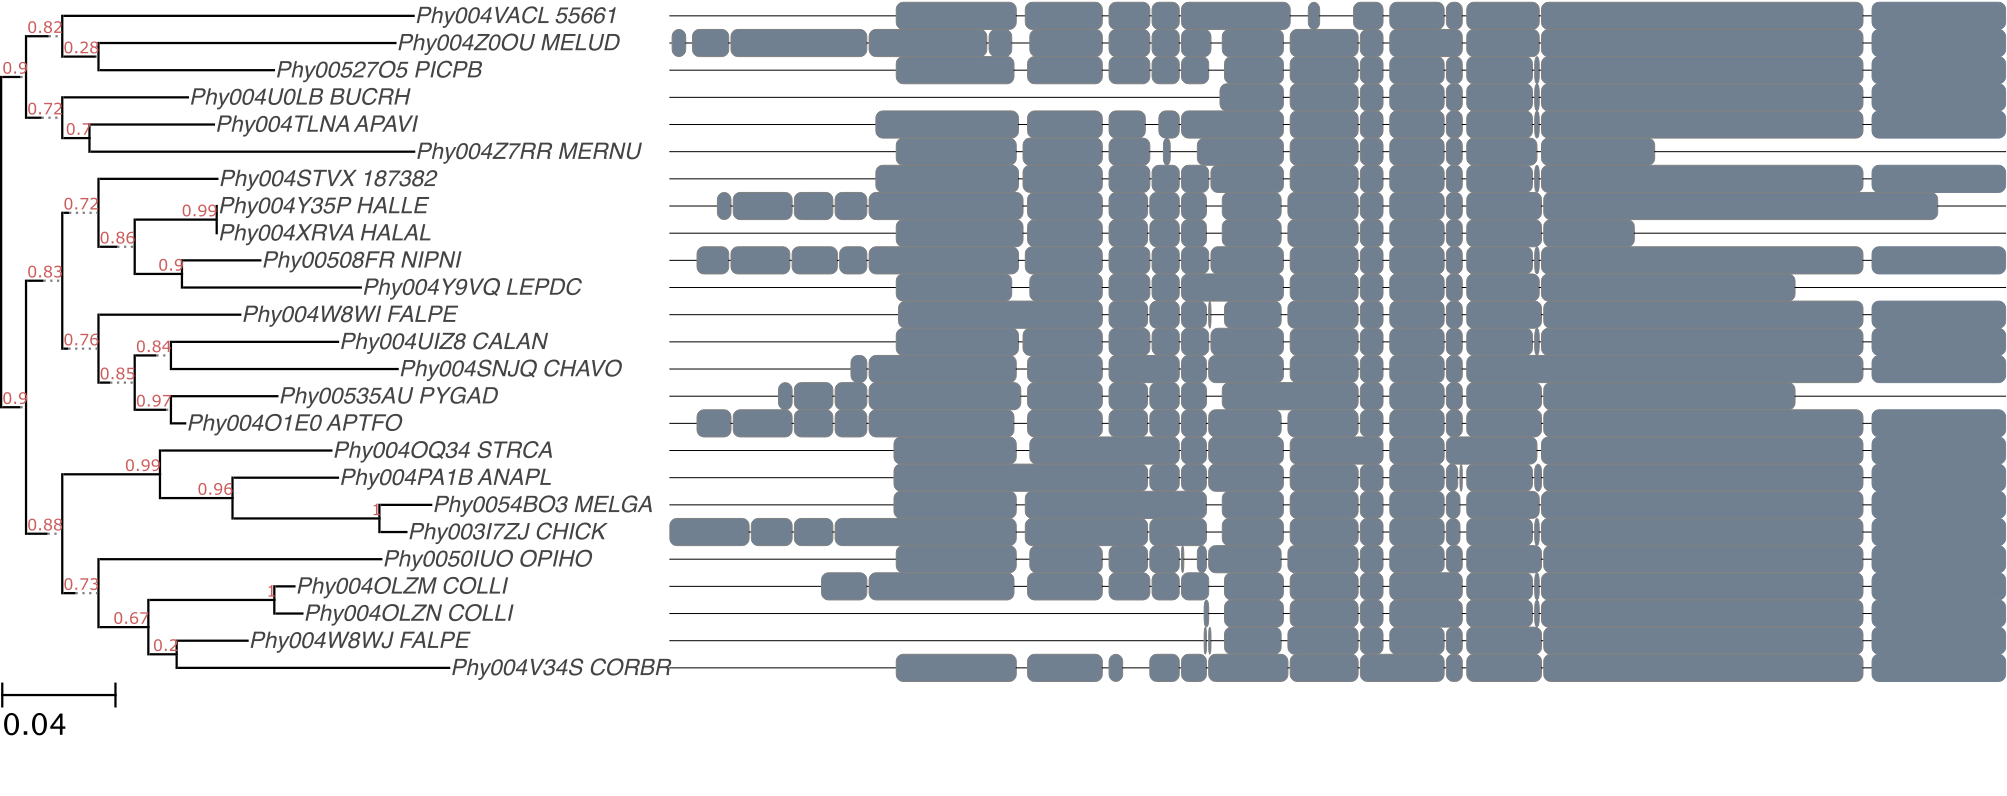

In [25]:
from IPython.display import Image
Image(filename='test_aligners/clustalo_default-none-none-fasttree_default/NUP62.aa.fa.final_tree.png')

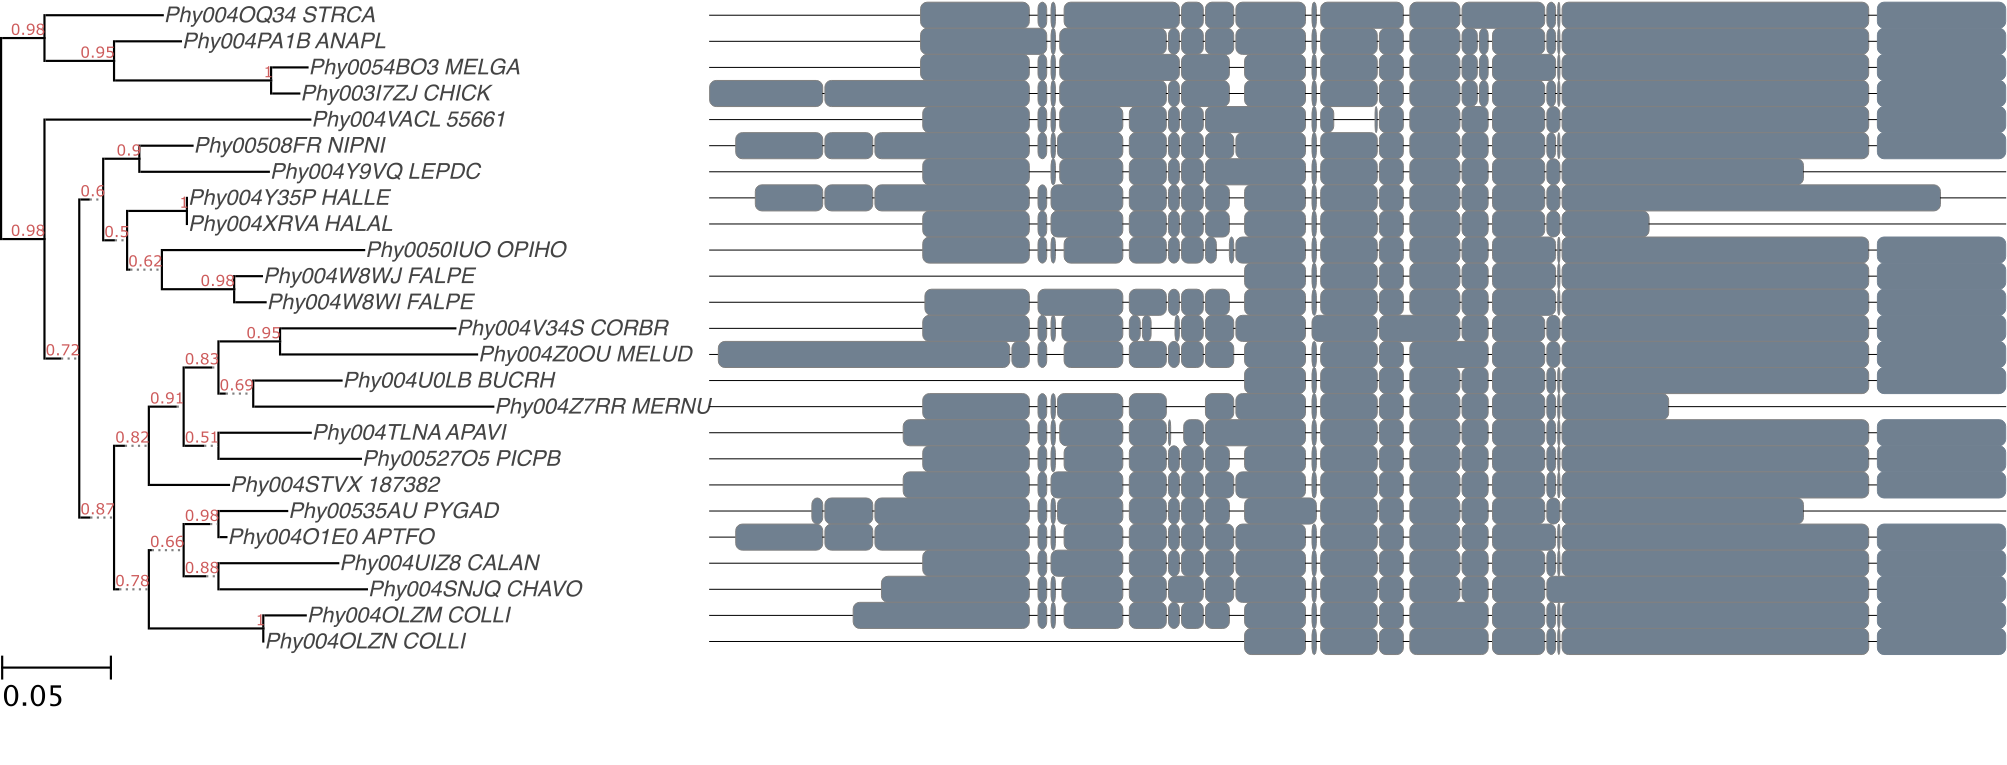

In [23]:
Image(filename='test_aligners/mafft_linsi-none-none-fasttree_default/NUP62.aa.fa.final_tree.png')
